In [1]:
%matplotlib inline
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

geo = "GSE171517"

In [2]:
data = GEOparse.get_GEO(geo=geo, destdir="../Dataset/Duan2021")

31-Mar-2022 18:04:59 DEBUG utils - Directory ../Dataset/Duan2021 already exists. Skipping.
31-Mar-2022 18:04:59 INFO GEOparse - File already exist: using local version.
31-Mar-2022 18:04:59 INFO GEOparse - Parsing ../Dataset/Duan2021\GSE171517_family.soft.gz: 
31-Mar-2022 18:04:59 DEBUG GEOparse - DATABASE: GeoMiame
31-Mar-2022 18:04:59 DEBUG GEOparse - SERIES: GSE171517
31-Mar-2022 18:04:59 DEBUG GEOparse - PLATFORM: GPL18058
31-Mar-2022 18:04:59 DEBUG GEOparse - SAMPLE: GSM5226511
31-Mar-2022 18:04:59 DEBUG GEOparse - SAMPLE: GSM5226512
31-Mar-2022 18:04:59 DEBUG GEOparse - SAMPLE: GSM5226513
31-Mar-2022 18:04:59 DEBUG GEOparse - SAMPLE: GSM5226514
31-Mar-2022 18:04:59 DEBUG GEOparse - SAMPLE: GSM5226515
31-Mar-2022 18:04:59 DEBUG GEOparse - SAMPLE: GSM5226516
31-Mar-2022 18:04:59 DEBUG GEOparse - SAMPLE: GSM5226517
31-Mar-2022 18:04:59 DEBUG GEOparse - SAMPLE: GSM5226518
31-Mar-2022 18:04:59 DEBUG GEOparse - SAMPLE: GSM5226519
31-Mar-2022 18:04:59 DEBUG GEOparse - SAMPLE: GSM5226520

In [3]:
data.gpls["GPL18058"].table.iloc[30:40]

,ID,Human_miRNA,Human_miRBase,Mouse_miRNA,Mouse_miRBase,Rat_miRNA,Rat_miRBase,miRNA_ID,SPOT_ID
30,10976,hsa-miR-182-3p,MIMAT0000260,mmu-miR-182-3p,MIMAT0016995,NaN,NaN,hsa-miR-182-3p,NaN
31,10977,hsa-miR-183-5p,MIMAT0000261,mmu-miR-183-5p,MIMAT0000212,rno-miR-183,MIMAT0000860,hsa-miR-183-5p,NaN
32,10985,hsa-miR-191-5p,MIMAT0000440,mmu-miR-191-5p,MIMAT0000221,rno-miR-191,MIMAT0000866,hsa-miR-191-5p,NaN
33,10986,hsa-miR-193a-3p,MIMAT0000459,mmu-miR-193-3p,MIMAT0000223,rno-miR-193,MIMAT0000868,hsa-miR-193a-3p,NaN
34,10987,hsa-miR-193b-3p,MIMAT0002819,NaN,NaN,NaN,NaN,hsa-miR-193b-3p,NaN
35,10988,hsa-miR-194-5p,MIMAT0000460,mmu-miR-194-5p,MIMAT0000224,rno-miR-194,MIMAT0000869,hsa-miR-194-5p,NaN
36,10990,hsa-miR-196a-5p,MIMAT0000226,mmu-miR-196a-5p,MIMAT0000518,rno-miR-196a,MIMAT0000871,hsa-miR-196a-5p,NaN
37,10991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10991
38,10995,hsa-miR-199a-3p/hsa-miR-199b-3p,NaN,mmu-miR-199a-3p/mmu-miR-199b-3p,NaN,rno-miR-199a-3p,MIMAT0004738,hsa-miR-199a-3p/hsa-miR-199b-3p,NaN
39,10997,hsa-miR-19a-3p,MIMAT0000073,mmu-miR-19a-3p,MIMAT0000651,rno-miR-19a,MIMAT0000789,hsa-miR-19a-3p,NaN


In [4]:
list(data.gsms.values())[0].metadata

{'title': ['LC_Serum_Exp1'],
 'geo_accession': ['GSM5226511'],
 'status': ['Public on Apr 06 2021'],
 'submission_date': ['Apr 05 2021'],
 'last_update_date': ['Apr 06 2021'],
 'type': ['RNA'],
 'channel_count': ['1'],
 'source_name_ch1': ['Serum, Lung Cancer Patient, Experimental Group, 01'],
 'organism_ch1': ['Homo sapiens'],
 'taxid_ch1': ['9606'],
 'characteristics_ch1': ['sample type: Serum',
  'pathology: SCC',
  'tnm: T2aN0M0',
  'Stage: IB',
  'disease state: lung cancer'],
 'molecule_ch1': ['total RNA'],
 'extract_protocol_ch1': ['Total RNA was isolated using TRI reagent BD (MRCgene, TB-126) according to manufacturerâ€™s instructions. RNA quality and quantity was measured by using nanodrop spectrophotometer (ND-1000, Nanodrop Technologies).'],
 'label_ch1': ['Hy3'],
 'label_protocol_ch1': ["After RNA isolation from the samples, the miRCURYâ„¢ Hy3â„¢/Hy5â„¢ Power labeling kit (Exiqon, Vedbaek, Denmark) was used according to the manufacturerâ€™s guideline for miRNA labelling. On

In [5]:
table = pd.concat([val.table.iloc[:,min(1,i):] for i, val in enumerate(data.gsms.values())], axis=1).transpose()

In [6]:
table

,0,1,2,3,4,5,6,7,8,9,...,3533,3534,3535,3536,3537,3538,3539,3540,3541,3542
ID_REF,13138.000000,42638.000000,42888.000000,17519.000000,17278.000000,46507.000000,17928.000000,42826.000000,17537.000000,42722.000000,...,169021.000000,168774.0,169286.000000,168902.000000,168880.000000,169301.00000,169077.000000,168816.0,169280.0,168835.000000
VALUE,28.164547,0.064323,0.360509,0.047868,0.031414,0.107704,NaN,0.949888,0.080778,0.064323,...,0.038893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001496
VALUE,48.563729,0.034960,0.093227,NaN,NaN,0.796795,NaN,1.308084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VALUE,9.863926,0.114812,0.060950,NaN,NaN,0.133239,NaN,1.206237,0.082211,0.011339,...,0.109142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VALUE,91.649922,0.053375,0.067504,NaN,NaN,0.065934,NaN,1.043956,0.051805,0.040816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VALUE,118.200340,NaN,NaN,NaN,NaN,0.210526,NaN,1.920204,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VALUE,26.656143,NaN,NaN,NaN,NaN,0.020590,NaN,0.997941,0.054907,0.012354,...,0.037062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VALUE,20.544098,0.065129,0.162822,NaN,NaN,0.028494,NaN,0.672999,0.100407,0.052917,...,0.075984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005427
VALUE,3.759651,0.170610,0.839352,0.004981,0.006227,0.230386,0.006227,2.073474,0.276463,0.022416,...,0.069738,NaN,NaN,0.014944,0.004981,NaN,0.002491,NaN,NaN,0.052304
VALUE,3.657582,0.360587,0.556254,0.005590,0.015374,0.381551,0.111810,1.327743,0.328442,0.048917,...,0.167715,NaN,NaN,0.012579,0.018169,0.00559,0.016771,NaN,NaN,0.064291


In [7]:
table = table.replace(-1, np.nan)

In [8]:
table = table.fillna(table.min().min())

In [9]:
mirnas = table.iloc[0, :].transpose().astype(int)
table = table.iloc[1:, :]

In [10]:
np.mean(table)

0       31.557016
1        0.118543
2        0.380985
3        0.009009
4        0.011098
          ...    
3538     0.001607
3539     0.010122
3540     0.001245
3541     0.001245
3542     0.018817
Length: 3543, dtype: float64

In [11]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table, ddof=1)

In [12]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

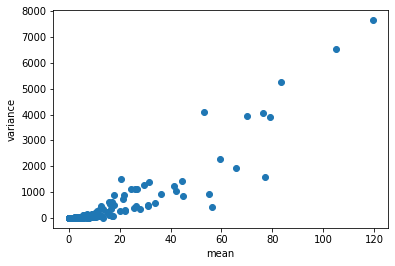

In [13]:
mean_variance_plot(table)

### Trying log-transformation

In [14]:
log_table = table #np.log2(table)

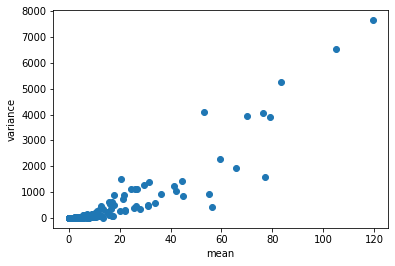

In [15]:
mean_variance_plot(log_table)

In [16]:
norm_log_table = log_table# - np.mean(log_table)

In [17]:
#norm_log_table /= np.sqrt(np.mean(np.var(norm_log_table, ddof=1)))

In [18]:
norm_log_table.var().mean()

19.814505550255287

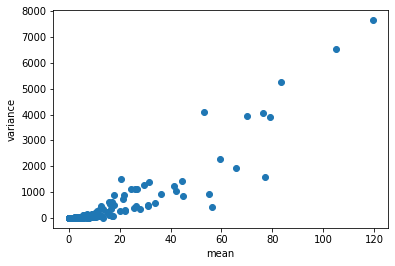

In [19]:
mean_variance_plot(norm_log_table)

In [20]:
pca = decomposition.PCA(n_components=2)

In [21]:
pca.fit(norm_log_table)

PCA(n_components=2)

In [22]:
components = pca.transform(norm_log_table)

In [23]:
components

array([[ 175.81883121,   36.32862892],
       [ 192.40902904,    2.70460787],
       [  70.12160292,  -79.11386097],
       [ 164.5265265 ,    2.97848959],
       [ 372.24718921,   77.17258381],
       [ 169.92194521,  -44.03277099],
       [  40.64519552,  -79.69927419],
       [-228.61830345,  -84.1961019 ],
       [-239.75280289,  -57.42280604],
       [-241.39361657,   -3.87816442],
       [-229.25946012,  156.12526586],
       [-246.66613658,   73.03340244]])

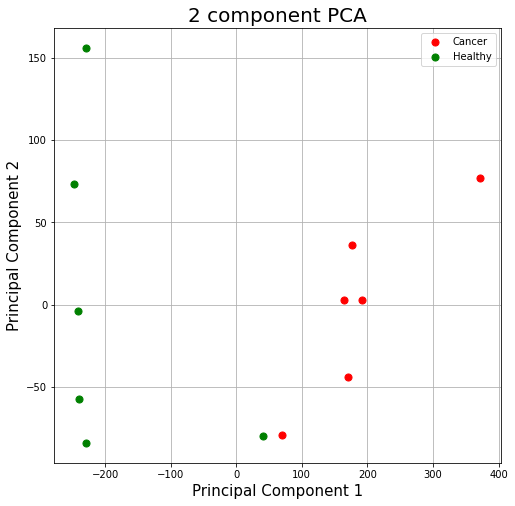

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[:6, 0], components[:6, 1], c = 'r', s = 50)
ax.scatter(components[6:, 0], components[6:, 1], c = 'g', s = 50)
ax.legend(targets)
ax.grid()
plt.savefig("../Figures/PCA/Duan2021.pgf")

In [25]:
labels = np.array(["Control" if i > 6 else "Cancer" for i in range(12)])
pca_data = pd.DataFrame(components)
pca_data["Type"] = labels
pca_data.columns = ["PCA1", "PCA2", "Type"]
pca_data.to_csv("../Outdata/PCA/Duan2021.csv")

### Exporting data

In [26]:
id_lookup = data.gpls["GPL18058"].table
id_lookup.head()

,ID,Human_miRNA,Human_miRBase,Mouse_miRNA,Mouse_miRBase,Rat_miRNA,Rat_miRBase,miRNA_ID,SPOT_ID
0,10138,hsa-miR-130a-3p,MIMAT0000425,mmu-miR-130a-3p,MIMAT0000141,rno-miR-130a,MIMAT0000836,hsa-miR-130a-3p,NaN
1,10306,hsa-miR-146b-5p,MIMAT0002809,mmu-miR-146b-5p,MIMAT0003475,rno-miR-146b,MIMAT0005595,hsa-miR-146b-5p,NaN
2,105441,hsa-miR-518c-3p,MIMAT0002848,NaN,NaN,NaN,NaN,hsa-miR-518c-3p,NaN
3,10899,spike_control_v1_j,NaN,spike_control_v1_j,NaN,spike_control_v1_j,NaN,NaN,spike_control_v1_j
4,10901,hsa_negative_control_6,NaN,hsa_negative_control_6,NaN,hsa_negative_control_6,NaN,NaN,hsa_negative_control_6


In [27]:
id_lookup = id_lookup.set_index("ID")

In [28]:
id_lookup.loc[mirnas[:10]]

,Human_miRNA,Human_miRBase,Mouse_miRNA,Mouse_miRBase,Rat_miRNA,Rat_miRBase,miRNA_ID,SPOT_ID
ID,,,,,,,,
13138,Hy3,NaN,Hy3,NaN,Hy3,NaN,NaN,Hy3
42638,hsa-miR-23a-5p,MIMAT0004496,mmu-miR-23a-5p,MIMAT0017019,rno-miR-23a*,MIMAT0004712,hsa-miR-23a-5p,NaN
42888,NaN,NaN,mmu-miR-875-3p,MIMAT0004938,NaN,NaN,NaN,42888
17519,ebv-miR-BART1-3p,MIMAT0003390,NaN,NaN,NaN,NaN,NaN,ebv-miR-BART1-3p
17278,NaN,NaN,mmu-miR-719,MIMAT0003465,NaN,NaN,NaN,17278
46507,hsa-miR-921,MIMAT0004971,NaN,NaN,NaN,NaN,hsa-miR-921,NaN
17928,hsa-miR-181a-2-3p,MIMAT0004558,NaN,NaN,NaN,NaN,hsa-miR-181a-2-3p,NaN
42826,NaN,NaN,mmu-miR-300-5p,MIMAT0004578,rno-miR-300-5p,MIMAT0004743,NaN,42826
17537,NaN,NaN,mghv-miR-M1-3,MIMAT0001566,NaN,NaN,NaN,17537


In [29]:
mirbase_ids = id_lookup.loc[mirnas]["Human_miRBase"]

In [30]:
mask = np.logical_not(mirbase_ids.isna()).to_numpy()

In [31]:
mask[:10]

array([False,  True, False,  True, False,  True,  True, False, False,
       False])

In [32]:
mirbase_ids = mirbase_ids[mask]

In [33]:
norm_log_table = norm_log_table.loc[:, mask]

In [34]:
from Scripts import converters

In [35]:
sequences = converters.mirbase_to_seq(mirbase_ids, ignore_not_found=True)

In [36]:
sequences.count(None)

3

In [37]:
sequences = np.array(sequences)

In [38]:
mask = sequences != None

In [39]:
sequences = sequences[mask]
norm_log_table = norm_log_table.loc[:, mask]

In [40]:
norm_log_table.columns = sequences
norm_log_table["cancer"] = np.array(6*[True] + 6*[False])

In [41]:
norm_log_table.to_csv("../TransformedData/Duan2021_raw.csv", index=False)